## Unsupervised Learning Algorithms

### Clustering Analysis
- #### Kmeans Clustering Algorithm
- #### Agglomerative Hierrarchial Clustering

### Hierrarchial Clustering

- A.k.a Agglomerative clustering, does not require the user to specify the number of clusters. 
- Initially, each point is considered as a separate cluster, then it recursively clusters the points together depending upon the distance between them. 
- The points are clustered in such a way that the distance between points within a cluster is minimum and distance between the cluster is maximum. 
- Commonly used distance measures are Euclidean distance, Manhattan distance or Mahalanobis distance. Unlike k-means clustering, it is "bottom-up" approach.



Reading Reference for Clustering Algorithms -
https://scikit-learn.org/stable/modules/clustering.html#clustering

### Step1: Load Libraries

In [1]:
import numpy as np            # Data manipulation
import pandas as pd           # Dataframe manipulatio 
import matplotlib.pyplot as plt                   # For graphics
import seaborn as sns
from sklearn.preprocessing import StandardScaler  # For scaling dataset
from sklearn.cluster import KMeans, AgglomerativeClustering

### Step2: Load Data

In [2]:
df_raw = pd.read_csv("./data/world-happiness-report/mtcars.csv")
df_raw.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


### Step3: Explore Data

In [3]:
df_raw.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


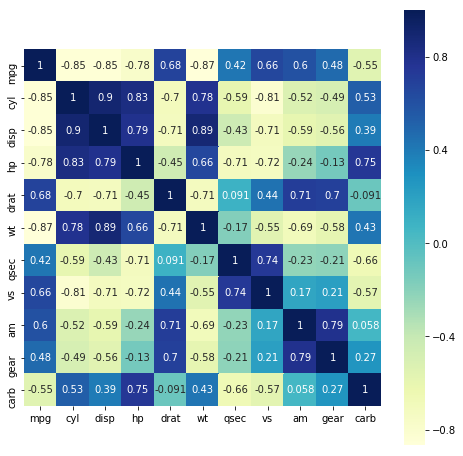

In [5]:
# Plot Correlation Heatmap to analyse correlation between continuous variables
df = df_raw[["mpg","cyl","disp","hp","drat","wt","qsec","vs","am","gear","carb"]] #Subsetting the data
cor = df.corr() #Calculate the correlation of the above variables

fig,ax = plt.subplots()
fig.set_figwidth(8)
fig.set_figheight(8)
sns.heatmap(cor, square = True,annot=True,cmap="YlGnBu") #Plot the correlation as heat map

### Step4: Agglomorative Approach to identify clusters

- Starts with one cluster and adds items or data points closer to it in iterative manner till all the points are added to one single large cluster.
- Its a bottom up approach where clustering starts with individual points and stops at one large cluster that includes all the points.

### Main Approaches to merge data points:
- Single Link: distance between closest members of a cluster. **Most Comonly Used**
- Complete Linkage: distance between members which aqre farthest apart
- Average Linage: looking at distance between each pair and averages all those distances

In [6]:
def doAgglomerative(X, nclust=2):
    model = AgglomerativeClustering(n_clusters=nclust, affinity = 'euclidean', linkage = 'ward')
    clust_labels1 = model.fit_predict(X)
    return (clust_labels1)

In [7]:
clust_labels1 = doAgglomerative(df, 2)
agglomerative = pd.DataFrame(clust_labels1)
df.insert((df.shape[1]),'agglomerative',agglomerative)

In [8]:
# Just to check if kmeans column added to the dataframe
df.tail()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,agglomerative
27,30.4,4,95.1,113,3.77,1.513,16.9,1,1,5,2,1
28,15.8,8,351.0,264,4.22,3.170,14.5,0,1,5,4,0
29,19.7,6,145.0,175,3.62,2.770,15.5,0,1,5,6,1
30,15.0,8,301.0,335,3.54,3.570,14.6,0,1,5,8,0
31,21.4,4,121.0,109,4.11,2.780,18.6,1,1,4,2,1


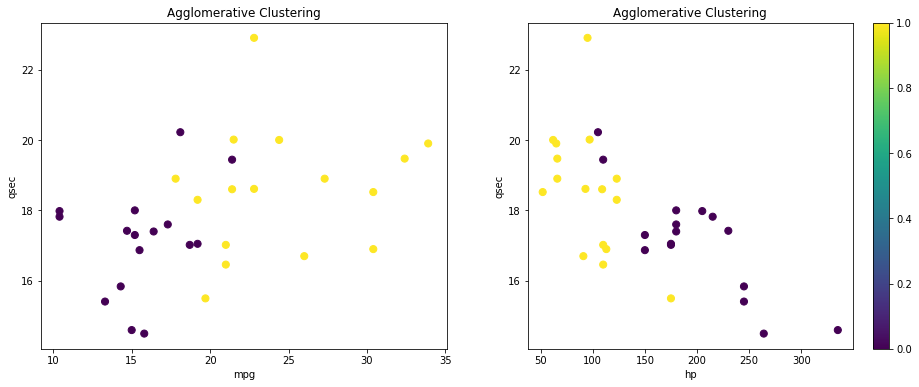

In [10]:
# Plot scatter plot
fig, (ax0,ax1) = plt.subplots(ncols= 2)
fig.set_figwidth(16)
fig.set_figheight(6)

# Scatter plots of Corruption vs GDP
scatter = ax0.scatter(df['mpg'],df['qsec'],
                     c=agglomerative[0],s=50)
ax0.set_title('Agglomerative Clustering')
ax0.set_xlabel('mpg')
ax0.set_ylabel('qsec')

# Scatter plots of Corruption vs GDP

scatter = ax1.scatter(df['hp'],df['qsec'],
                     c=agglomerative[0],s=50)
ax1.set_title('Agglomerative Clustering')
ax1.set_xlabel('hp')
ax1.set_ylabel('qsec')

plt.colorbar(scatter)

In [11]:
# Convert Cluster to
df["cluster_name"] = df["agglomerative"].apply(lambda x: "cluster0" if x == 0 else "cluster1")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [12]:
df.tail()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,agglomerative,cluster_name
27,30.4,4,95.1,113,3.77,1.513,16.9,1,1,5,2,1,cluster1
28,15.8,8,351.0,264,4.22,3.170,14.5,0,1,5,4,0,cluster0
29,19.7,6,145.0,175,3.62,2.770,15.5,0,1,5,6,1,cluster1
30,15.0,8,301.0,335,3.54,3.570,14.6,0,1,5,8,0,cluster0
31,21.4,4,121.0,109,4.11,2.780,18.6,1,1,4,2,1,cluster1


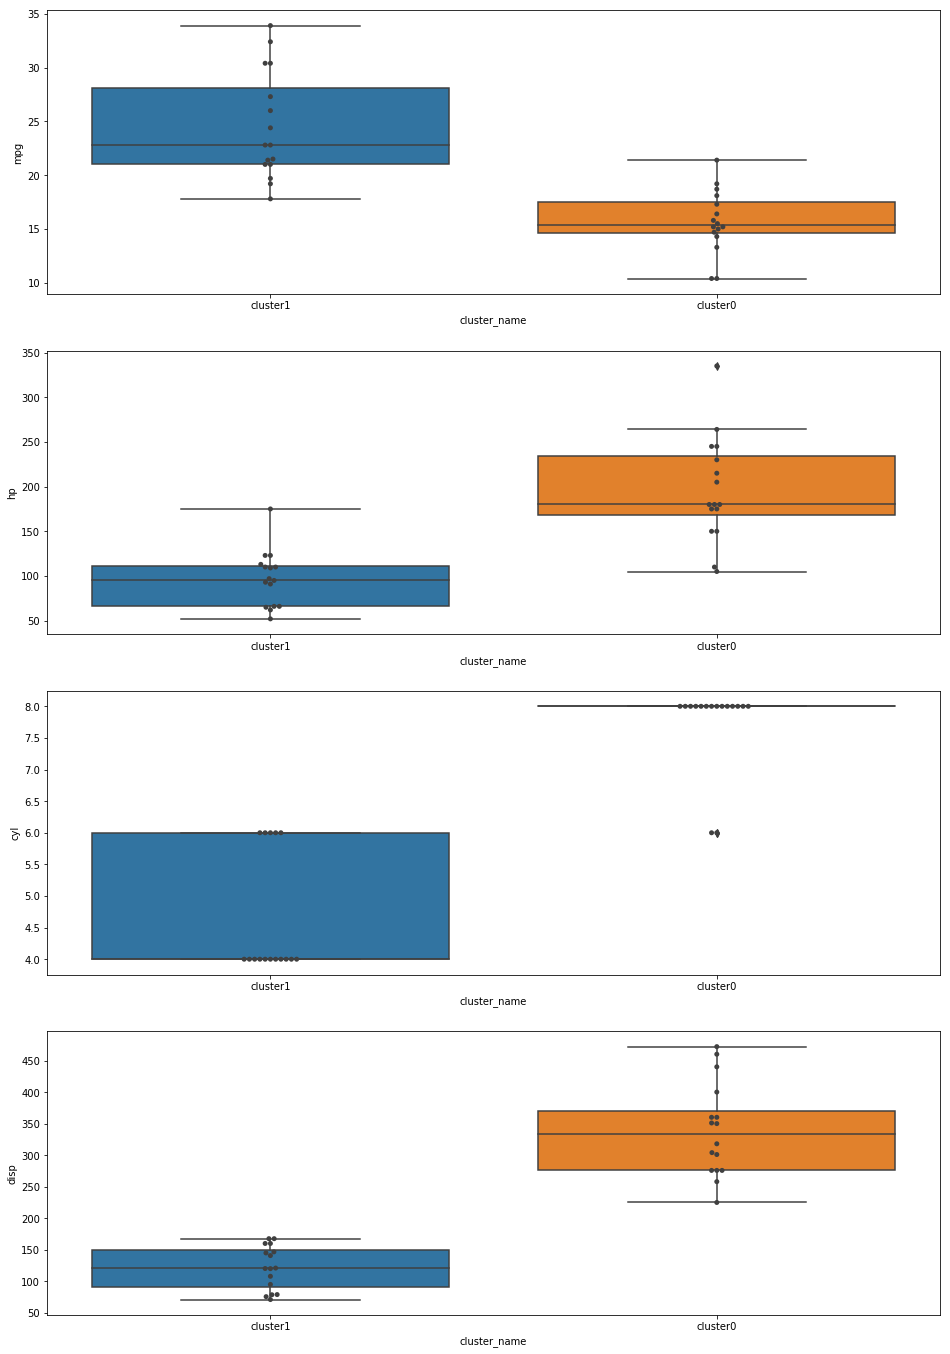

In [15]:
fig, (ax,ax2,ax3,ax4) = plt.subplots(nrows = 4)
fig.set_figwidth(16)
fig.set_figheight(24)
x = sns.boxplot(x="cluster_name", y='mpg', data=df, ax= ax)
x = sns.swarmplot(x="cluster_name", y='mpg', data=df,color=".25",ax= ax)
# Cluster analysis of employment
x = sns.boxplot(x="cluster_name", y='hp', data=df, ax= ax2)
x = sns.swarmplot(x="cluster_name", y='hp', data=df,color=".25",ax= ax2)
# Cluster analysis of employment
x = sns.boxplot(x="cluster_name", y='cyl', data=df, ax= ax3)
x = sns.swarmplot(x="cluster_name", y='cyl', data=df,color=".25",ax= ax3)
# Cluster analysis of employment
x = sns.boxplot(x="cluster_name", y='disp', data=df, ax= ax4)
x = sns.swarmplot(x="cluster_name", y='disp', data=df,color=".25",ax= ax4)

In [16]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [17]:
df = df.set_index('cluster_name')
del df.index.name

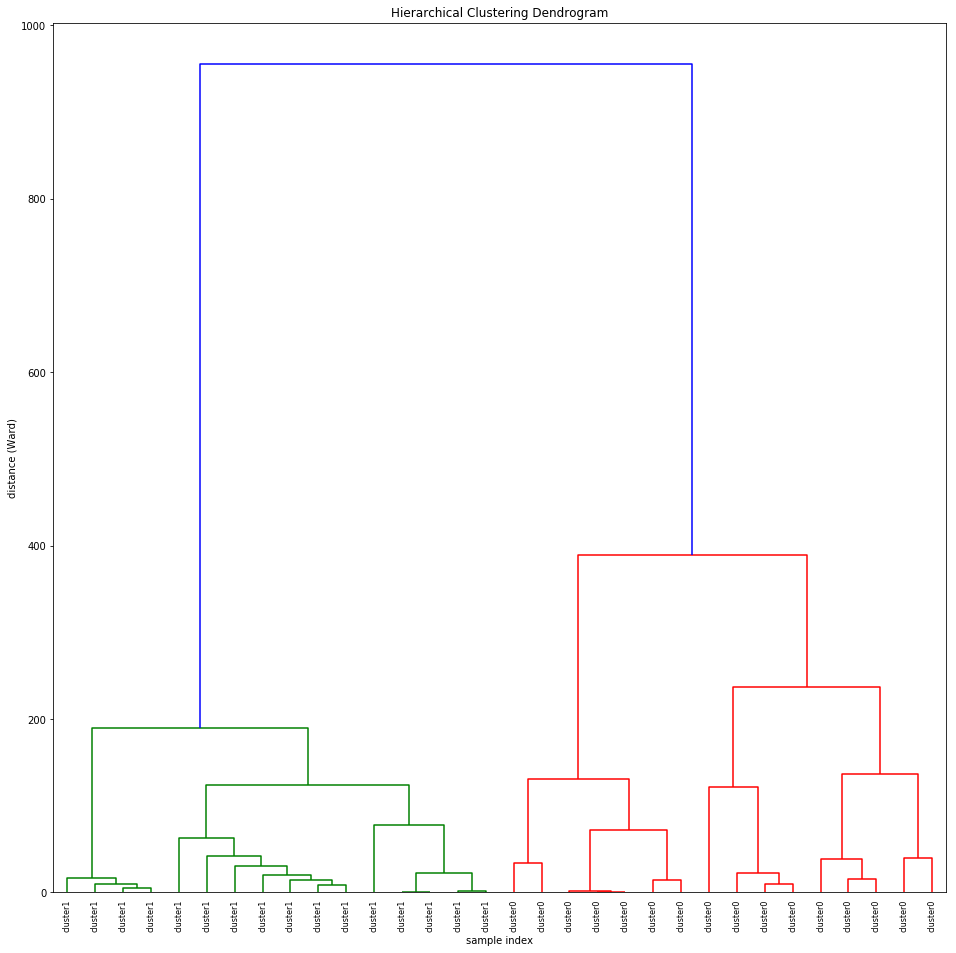

In [18]:
# Calculate the distance between each sample
Z = linkage(df, 'ward')
 
# Make the dendro
fig, ax = plt.subplots()
fig.set_figwidth(16)
fig.set_figheight(16)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance (Ward)')
dn = dendrogram(Z, labels=df.index, leaf_rotation=90)